In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import random

def copy_random_images(source_folder, destination_folder, num_images_to_copy):
    # Get list of images in the source folder
    image_files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]
    
    # Select random images from the list
    random_images = random.sample(image_files, min(num_images_to_copy, len(image_files)))
    
    # Copy selected images to destination folder
    for image in random_images:
        source_path = os.path.join(source_folder, image)
        destination_path = os.path.join(destination_folder, image)
        shutil.copyfile(source_path, destination_path)
        print(f"Copied {image} to {destination_folder}")

# Example usage:
source_folder = "D:/Deepfake Detection/dataset/real_vs_fake/real-vs-fake/train/fake"
destination_folder = "D:/Deepfake Detection/modified dataset/real_vs_fake/real-vs-fake/train/fake"
num_images_to_copy = 12500  # Adjust this number as needed

copy_random_images(source_folder, destination_folder, num_images_to_copy)

In [3]:
pip install --upgrade tensorflow

  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import glob
import cv2
import numpy as np
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf

In [4]:
import os

# Assuming the dataset folder is located in the root directory of Google Drive
dataset_folder_path = '/Users/riasanjay/Downloads/DMProject/df/real_vs_fake/real-vs-fake'
os.chdir(dataset_folder_path)

In [5]:
train_dir = os.path.join(dataset_folder_path, 'train')
valid_dir = os.path.join(dataset_folder_path, 'valid')
test_dir = os.path.join(dataset_folder_path, 'test')

In [6]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(valid_dir))
print("Test_dir Subfolders: ", os.listdir(test_dir))

Train_dir Subfolders:  ['real', 'fake']
Valid_dir Subfolders:  ['real', 'fake']
Test_dir Subfolders:  ['real', 'fake']


In [7]:
# Define the paths to train, valid, and test directories
train_dir = os.path.join(dataset_folder_path, 'train')
valid_dir = os.path.join(dataset_folder_path, 'valid')
test_dir = os.path.join(dataset_folder_path, 'test')

# List subfolders and sort them
train_subfolders = sorted(os.listdir(train_dir))
valid_subfolders = sorted(os.listdir(valid_dir))
test_subfolders = sorted(os.listdir(test_dir))

# Print the sorted subfolders
print("Train_dir Subfolders: ", train_subfolders)
print("Valid_dir Subfolders: ", valid_subfolders)
print("Test_dir Subfolders: ", test_subfolders)

Train_dir Subfolders:  ['fake', 'real']
Valid_dir Subfolders:  ['fake', 'real']
Test_dir Subfolders:  ['fake', 'real']


## EXPLORATORY ANALYSIS

In [8]:
import os

# Define the path to the folder
folder_path = '/Users/riasanjay/Downloads/DMProject/df/real_vs_fake/real-vs-fake'

# List all files in the folder
files = os.listdir(folder_path)

# Get the number of files
num_files = len(files)

print("Number of files in the folder:", num_files)


Number of files in the folder: 3


In [12]:
import os

# Define the path to the folder
folder_path = '/Users/riasanjay/Downloads/DMProject/df/real_vs_fake/real-vs-fake/valid/real'

# List all files in the folder
files = os.listdir(folder_path)

# Get the number of files
num_files = len(files)

print("Number of files in the folder:", num_files)


Number of files in the folder: 500


In [9]:
import os

# Define the path to the folder
folder_path = '/content/drive/MyDrive/DMPROJECT/archive/real_vs_fake/real-vs-fake/test/real'

# List all files in the folder
files = os.listdir(folder_path)

# Count the number of .jpg files
num_jpg_files = sum(1 for file in files if file.endswith('.jpg'))

print("Number of .jpg files in the folder:", num_jpg_files)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DMPROJECT/archive/real_vs_fake/real-vs-fake/test/real'

In [9]:
images_df = {
    "folder":[],
    "image_path":[],
    "label":[]
}

for folder in os.listdir(dataset_folder_path): #iterate on each train, valid and test folder
    for label in os.listdir(dataset_folder_path + "/" + folder): #iterate on fake and real folders (labels)
        for img in glob.glob(dataset_folder_path + "/" + folder + "/" + label + "/*.jpg"):
            images_df["folder"].append(folder)
            images_df["image_path"].append(img)
            images_df["label"].append(label)

In [10]:
images_df = pd.DataFrame(images_df)
images_df

,folder,image_path,label
0,valid,/Users/riasanjay/Downloads/DMProject/df/real_v...,real
1,valid,/Users/riasanjay/Downloads/DMProject/df/real_v...,real
2,valid,/Users/riasanjay/Downloads/DMProject/df/real_v...,real
3,valid,/Users/riasanjay/Downloads/DMProject/df/real_v...,real
4,valid,/Users/riasanjay/Downloads/DMProject/df/real_v...,real
...,...,...,...
6995,train,/Users/riasanjay/Downloads/DMProject/df/real_v...,fake
6996,train,/Users/riasanjay/Downloads/DMProject/df/real_v...,fake
6997,train,/Users/riasanjay/Downloads/DMProject/df/real_v...,fake
6998,train,/Users/riasanjay/Downloads/DMProject/df/real_v...,fake


In [11]:
real_grouped_df = images_df[images_df['label'] == "real"].groupby('folder')
fake_grouped_df = images_df[images_df['label'] == "fake"].groupby('folder')

## Data Augmentation

In [12]:
image_train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    preprocessing_function=lambda x: x + np.random.normal(0, 0.1, x.shape)
)

image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [13]:
train_ds = image_train_gen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
)

valid_ds = image_gen.flow_from_directory(
    valid_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_ds = image_gen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False) #shuffle disabled

Found 5000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
def plot_images(img, label):
    plt.figure(figsize=[12, 12])
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(img[i])
        plt.axis('off')
        if label[i] == 0:
            plt.title("Fake")
        else:
            plt.title("Real")

# Data Visualization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

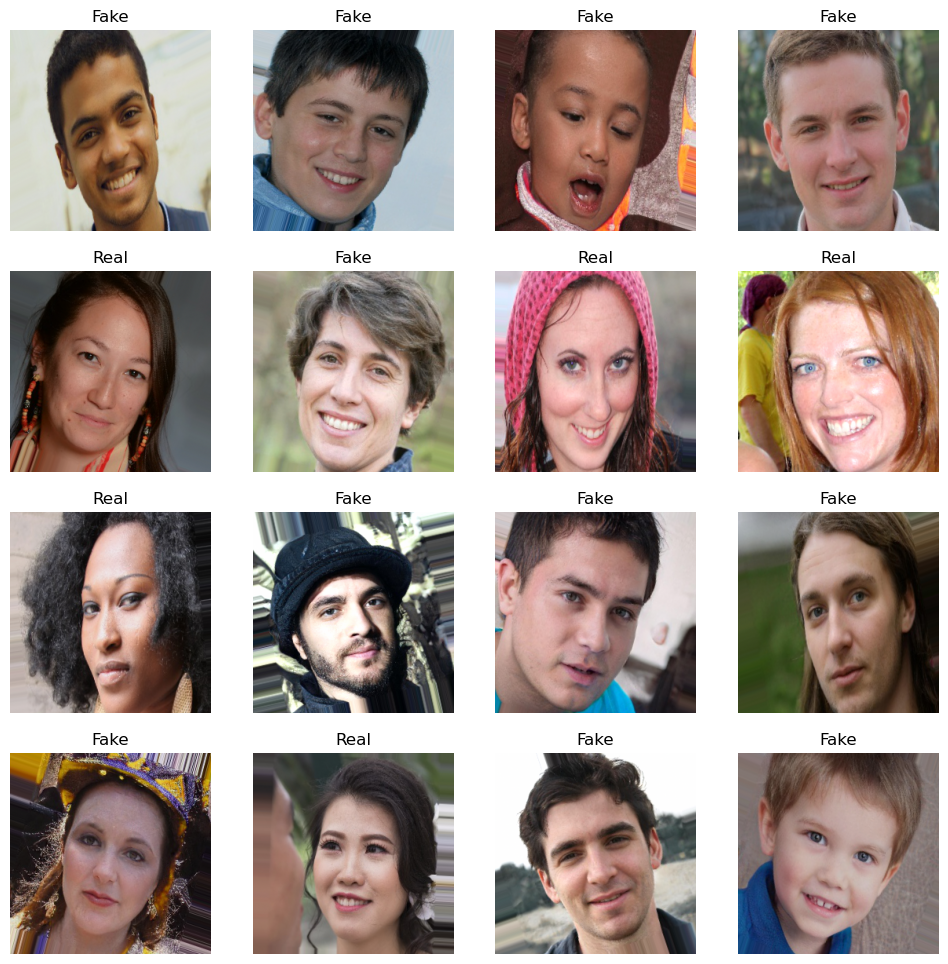

In [15]:
img,lbl = next(train_ds)
plot_images(img,lbl)

Histogram of Pixel Intensities:

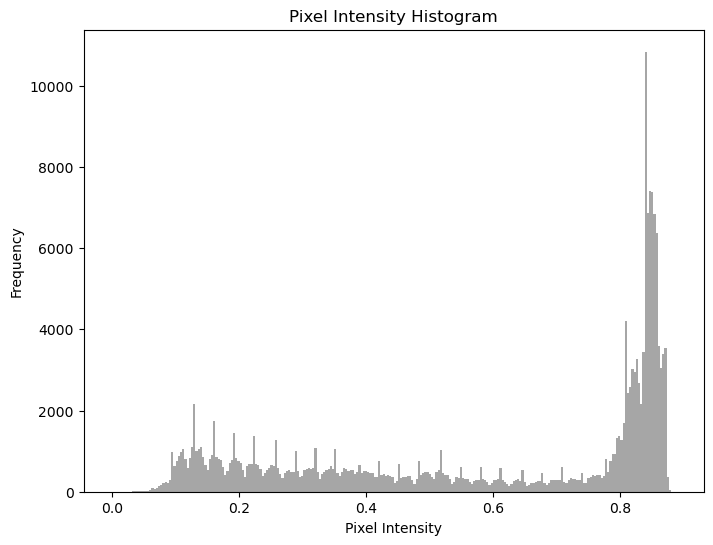

In [16]:
def plot_pixel_histogram(image):
    plt.figure(figsize=(8, 6))
    plt.hist(image.ravel(), bins=256, color='gray', alpha=0.7)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Pixel Intensity Histogram')
    plt.show()

# Plot histogram for a sample image
sample_image = img[0]  # Assuming img is a batch of images
plot_pixel_histogram(sample_image)


In [17]:
for img, label in train_ds:
    print("Values: ", img[0])
    print("Label: ", label[0])
    break

Values:  [[[0.05417879 0.03536108 0.03103717]
  [0.05461522 0.03494166 0.03201599]
  [0.05496064 0.03537642 0.03194518]
  ...
  [0.372217   0.26262823 0.33750543]
  [0.372772   0.26307705 0.33732355]
  [0.37244353 0.2626182  0.33681506]]

 [[0.05502021 0.03632071 0.03111339]
  [0.05494303 0.03541864 0.03083046]
  [0.05527264 0.03476482 0.03135978]
  ...
  [0.3722924  0.2625444  0.3370292 ]
  [0.3719549  0.2627722  0.33671197]
  [0.37225354 0.26282692 0.33738106]]

 [[0.0550471  0.03541346 0.0311572 ]
  [0.05468343 0.0357514  0.03095978]
  [0.05495821 0.03513043 0.03108061]
  ...
  [0.37262192 0.26261315 0.33750367]
  [0.37211013 0.26328355 0.337018  ]
  [0.37276128 0.26248392 0.33687073]]

 ...

 [[0.57650787 0.42758703 0.61169493]
  [0.57694244 0.42707127 0.6112364 ]
  [0.5758106  0.42810526 0.61210823]
  ...
  [0.10540738 0.07844272 0.07820991]
  [0.10625997 0.07848907 0.07870074]
  [0.10601851 0.07826086 0.07829227]]

 [[0.5761072  0.4278712  0.6115131 ]
  [0.5767829  0.4275124  0.6

In [18]:
for img, label in train_ds:
    print(img.shape)
    print(label.shape)
    break

(32, 256, 256, 3)
(32,)


In [19]:
train_ds.class_indices

{'fake': 0, 'real': 1}

# CNN model architecture (DenseNet121)

In [20]:
input_shape = (256, 256, 3) #define the input shape of our data

In [22]:
#create the model's architecture and compile it
def get_model(input_shape):

    input = tf.keras.Input(shape=input_shape)

    densenet = tf.keras.applications.DenseNet121( weights="imagenet", include_top=False, input_tensor = input)

    x = tf.keras.layers.GlobalAveragePooling2D()(densenet.output)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x) #binary classification

    model = tf.keras.Model(densenet.input, output)

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model


In [23]:
model_ft = get_model(input_shape)

model_ft.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 64, 64,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 64, 64,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 64, 64,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 64, 64,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 64, 64,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 64, 64,    │     12,288 │ conv2_block2_0_r

 Total params: 7,564,865 (28.86 MB)

 Trainable params: 7,480,193 (28.53 MB)

 Non-trainable params: 84,672 (330.75 KB)

In [24]:
tf.keras.utils.plot_model(model_ft, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [25]:
checkpoint_filepath = "/Users/riasanjay/Downloads/DMProject/model_cp.weights.h5"

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min', #minimize the loss value
    save_best_only=True)

In [42]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=5,
                                                     restore_best_weights=True,
                                                    )

In [43]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=3)

In [44]:
history_ft = model_ft.fit(train_ds,
                       epochs = 10,
                       validation_data = valid_ds,
                       callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr])

Epoch 1/10


/opt/anaconda3/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 3000s 19s/step - accuracy: 0.6296 - loss: 0.7888 - val_accuracy: 0.5950 - val_loss: 1.2103 - learning_rate: 0.0010
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1808s 11s/step - accuracy: 0.7654 - loss: 0.4953 - val_accuracy: 0.7530 - val_loss: 0.6506 - learning_rate: 0.0010
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1752s 11s/step - accuracy: 0.8100 - loss: 0.4281 - val_accuracy: 0.8050 - val_loss: 0.4710 - learning_rate: 0.0010
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1761s 11s/step - accuracy: 0.8315 - loss: 0.3805 - val_accuracy: 0.8100 - val_loss: 0.4192 - learning_rate: 0.0010
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1688s 11s/step - accuracy: 0.8689 - loss: 0.3193 - val_accuracy: 0.7990 - val_loss: 0.4781 - learning_rate: 0.0010
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1691s 11s/step - accuracy: 0.8802 - loss: 0.2873 - val_accuracy: 0.7810 - val_loss: 0.4718 - learning_rate: 0.0010
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1694s 11s/step - accuracy: 0.8916 - loss:

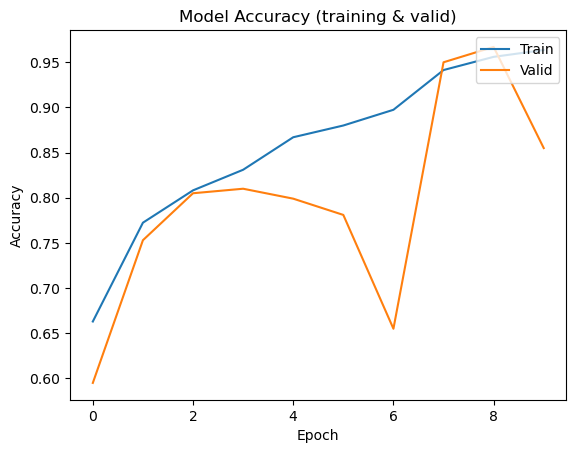

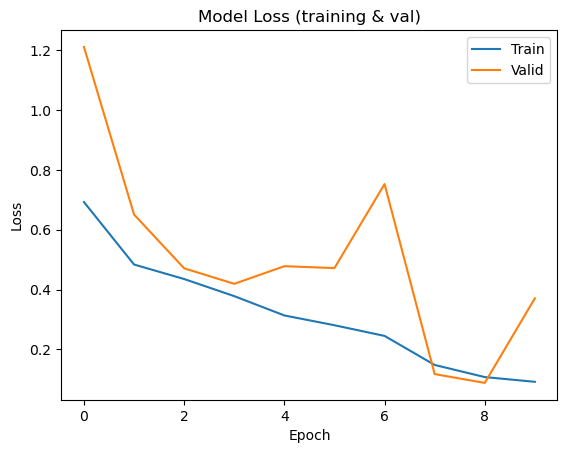

In [45]:
plt.plot(history_ft.history['accuracy'])
plt.plot(history_ft.history['val_accuracy'])
plt.title('Model Accuracy (training & valid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


plt.plot(history_ft.history['loss'])
plt.plot(history_ft.history['val_loss'])
plt.title('Model Loss (training & val)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()

In [46]:
# Evaluate the model on the test set
test_loss, test_acc = model_ft.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9506 - loss: 0.1097
Test Loss: 0.11111795157194138
Test Accuracy: 0.9509999752044678


In [50]:
model_ft.save('/Users/riasanjay/Downloads/DMProject/DENSENET.h5')

In [26]:
model = get_model(input_shape)

# Restore the weights
model.load_weights('/Users/riasanjay/Downloads/DMProject/model_cp.weights.h5')

/opt/anaconda3/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 738 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [27]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Real-time example

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Text(0.5, 1.0, 'This image is 99.65% Fake and 0.35% Real.')

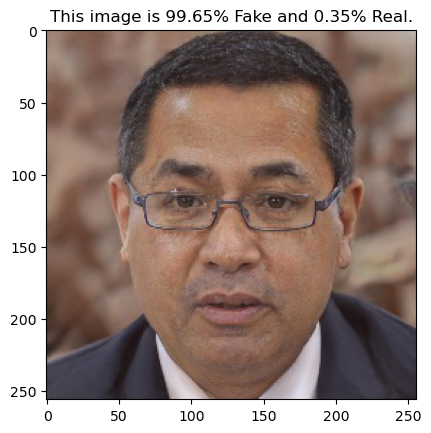

In [51]:
#real example
test_image = tf.keras.preprocessing.image.load_img('/Users/riasanjay/Downloads/DMProject/df/real_vs_fake/real-vs-fake/test/fake/Z7XU3ACNU4.jpg', target_size=(256, 256, 3))
plt.imshow(test_image)


test_image_arr = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_arr = np.expand_dims(test_image, axis=0)
test_image_arr = test_image_arr/255.


result = model.predict(test_image_arr)

plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Text(0.5, 1.0, 'This image is 0.05% Fake and 99.95% Real.')

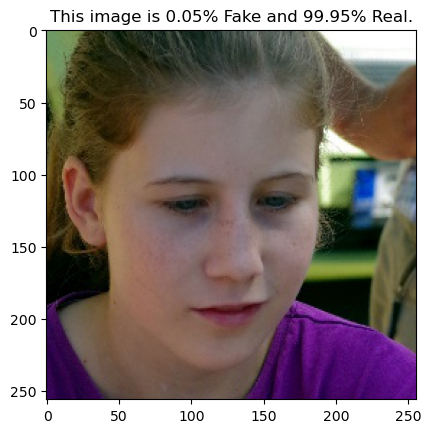

In [52]:
#real example
test_image = tf.keras.preprocessing.image.load_img('/Users/riasanjay/Downloads/DMProject/df/real_vs_fake/real-vs-fake/test/real/69239.jpg', target_size=(256, 256, 3))
plt.imshow(test_image)


test_image_arr = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_arr = np.expand_dims(test_image, axis=0)
test_image_arr = test_image_arr/255.


result = model.predict(test_image_arr)

plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")


In [53]:
predicted_labels = model.predict(test_ds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step


In [54]:
true_labels = test_ds.classes

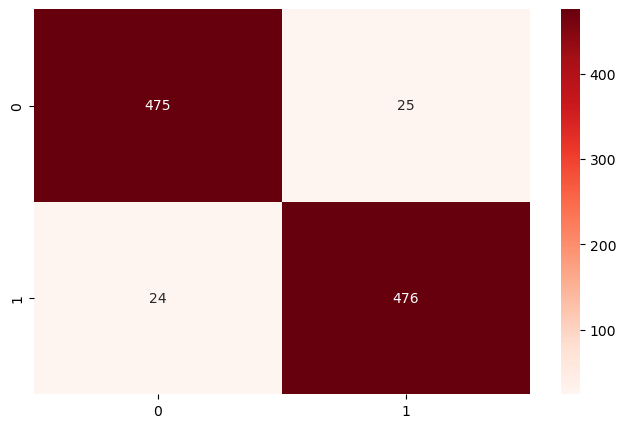

In [57]:
plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(true_labels, predicted_labels.round()), annot = True,fmt="d",cmap = "Reds")
plt.show()

In [58]:
metrics.accuracy_score(true_labels, predicted_labels.round())

0.951

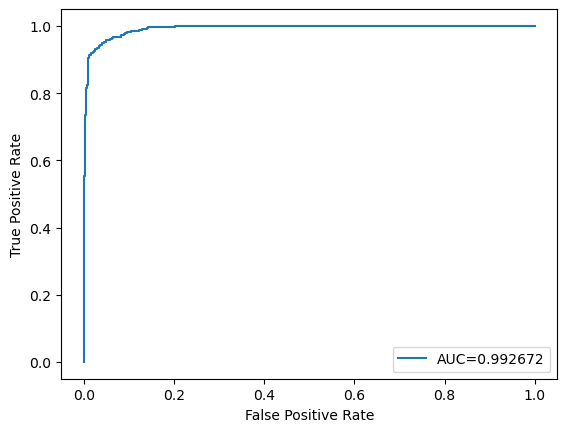

In [59]:
fpr, tpr, _ = metrics.roc_curve(true_labels,  predicted_labels)
auc = metrics.roc_auc_score(true_labels, predicted_labels)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [1]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(true_labels, predicted_labels)

print("Classification Report:")
print(report)


NameError: name 'true_labels' is not defined

# Feature Extraction

In [65]:
def get_feature_extractor(model):
    # Remove the top layers (fully connected layers) to obtain a feature extractor
    feature_extractor = Model(inputs=model.input, outputs=model.get_layer('global_average_pooling2d').output)
    return feature_extractor


In [66]:
# Assuming you have trained your model on your dataset and saved it as model_ft
# Get feature extractor from the trained model
feature_extractor = get_feature_extractor(model_ft)

# Extract features from your data
train_features = feature_extractor.predict(train_ds)
valid_features = feature_extractor.predict(valid_ds)
test_features = feature_extractor.predict(test_ds)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1141s 7s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 264s 8s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 228s 7s/step


In [68]:
print("Shape of extracted features:", train_features.shape)

Shape of extracted features: (5000, 1024)


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [75]:
# Define new model architecture
new_model = Sequential([
    Dense(256, activation='relu', input_shape=input_shape),  # Adjust input shape accordingly
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the new model
new_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


In [81]:
# Train the new model
history = new_model.fit(train_features,  # Pass train_features instead of train_ds
                        epochs=10,
                        batch_size=32,
                        validation_data=(valid_features, valid_ds))  # Pass valid_features instead of valid_ds


Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 1024), dtype=float32). Expected shape (None, 256, 256, 3), but input has incompatible shape (None, 1024)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1024), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# Evaluate the new model
loss, accuracy = new_model.evaluate(test_features, test_ds)
print('Test Accuracy:', accuracy)


## XCEPTIONET

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt


def ExceptionNet(input_shape=None):
    # Define the input layer
    img_input = Input(shape=input_shape)
   
    # Convolutional Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv1_1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv1_2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='pool1')(x)


    # Convolutional Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2_1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2_2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='pool2')(x)
   
    # Convolutional Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='pool3')(x)


    # Convolutional Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='conv4_1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='conv4_2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='conv4_3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='pool4')(x)


    # Convolutional Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='conv5_1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='conv5_2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='conv5_3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='pool5')(x)


    # Global average pooling
    x = GlobalAveragePooling2D()(x)


    # Fully connected layers
    x = Dense(1024, activation='relu', name='fc1')(x)
    x = Dense(1024, activation='relu', name='fc2')(x)
    x = Dense(512, activation='relu', name='fc3')(x)


    # Output layer
    output_layer = Dense(1, activation='sigmoid', name='output')(x)


    # Create the model
    model = Model(img_input, output_layer, name='ExceptionNet')
    return model




In [22]:
# Build ExceptionNet
exception_model = ExceptionNet(input_shape=(256, 256, 3))


# Compile the model with binary crossentropy loss and accuracy metric
exception_model.compile(loss='binary_crossentropy',
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        metrics=['accuracy'])


# Define callbacks for training
filepath_model = "/Users/riasanjay/Downloads/DMProject/model_exceptionnet.keras"
checkpoint = ModelCheckpoint(filepath_model, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')


reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2,
                              verbose=1, mode='max', min_lr=0.00001)
callbacks_list = [checkpoint, reduce_lr]


In [23]:

# Assuming train_ds and valid_ds are your training and validation datasets
history = exception_model.fit(train_ds,
                              validation_data=valid_ds,
                              epochs=10,
                              callbacks=callbacks_list)


Epoch 1/10


In [ ]:

# Save the trained model
exception_model.save("/Users/riasanjay/Downloads/DMProject/model_exceptionnet_trained.keras")


# Plot training and validation loss
plot_loss(history.epoch, history.history['loss'], history.history['val_loss'])


# Plot training and validation accuracy
plot_accuracy(history.epoch, history.history['accuracy'], history.history['val_accuracy'])



# VGGFace

Helper functions

In [37]:
"""
Plot the training and validation loss
epochs - list of epoch numbers
loss - training loss for each epoch
val_loss - validation loss for each epoch
"""
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
    
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [43]:
pip install --user keras-vggface

python(71398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras_applications

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
from keras_vggface.vggface import VGGFace
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks.callbacks import ReduceLROnPlateau

from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator


ImportError: cannot import name 'layer_utils' from 'keras.utils' (/opt/anaconda3/lib/python3.9/site-packages/keras/utils/__init__.py)

In [4]:
pip install keras --upgrade --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.5 MB/s eta 0:00:00
  Using cached h5py-3.11.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 6.4 MB/s eta 0:00:00
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached pygments-2.17.2-py3-none-any.whl.metadata (2.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 11.6 MB/s eta 0:00:00
Using cached h5py-3.11.0-cp39-cp39-macosx_11_0_arm64.whl (3.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 21.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.4/273.4 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 16.5 MB/s eta 0:00:00
Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
Usi

In [1]:
from keras_vggface.vggface import VGGFace
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


AttributeError: module 'tensorflow._api.v2.compat.v2.__internal__' has no attribute 'register_load_context_function'

In [5]:
pip uninstall keras
Y

Found existing installation: keras 3.3.3
Uninstalling keras-3.3.3:
  Would remove:
    /opt/anaconda3/lib/python3.9/site-packages/keras-3.3.3.dist-info/*
    /opt/anaconda3/lib/python3.9/site-packages/keras/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install keras==2.12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.1 requires keras>=3.0.0, but you have keras 2.12.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


# INCEPTION

In [60]:
from tensorflow.keras.models import load_model

model = load_model('/Users/riasanjay/Downloads/DMProject/inception.h5')

ValueError: Unknown layer: 'CustomScaleLayer'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [64]:
from keras.layers import Layer
from keras.models import load_model
from keras.utils import custom_object_scope

# Define your custom layer class
class CustomScaleLayer(Layer):
    def __init__(self, scale_factor, **kwargs):
        self.scale_factor = scale_factor
        super(CustomScaleLayer, self).__init__(**kwargs)

    def call(self, inputs):
        return inputs * self.scale_factor

    def get_config(self):
        config = super(CustomScaleLayer, self).get_config()
        config.update({'scale_factor': self.scale_factor})
        return config

# Function to build custom layer from config
def custom_scale_layer_from_config(config):
    return CustomScaleLayer(**config)

# Load the model with custom layer
with custom_object_scope({'CustomScaleLayer': custom_scale_layer_from_config}):
    model = load_model('/Users/riasanjay/Downloads/DMProject/inception.h5')


TypeError: custom_scale_layer_from_config() got an unexpected keyword argument 'name'